In [13]:
!pip install requests
!pip install spotipy
import requests
import base64
import requests
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import os
import time

In [14]:
client_id = '1f93f3e052ae4df38ce421234261a03c'
client_secret = '71539a1499644134a0fca9b4ef563a69'

In [15]:
client_creds = f"{client_id}:{client_secret}"

In [16]:
client_creds_b64 = base64.b64encode(client_creds.encode())
print(client_creds_b64)

b'MWY5M2YzZTA1MmFlNGRmMzhjZTQyMTIzNDI2MWEwM2M6NzE1MzlhMTQ5OTY0NDEzNGEwZmNhOWI0ZWY1NjNhNjk='


In [18]:
SPOTIPY_CLIENT_ID= client_id
SPOTIPY_CLIENT_SECRET= client_secret
SPOTIPY_REDIRECT_URI= 'http://127.0.0.1:9090'
SCOPE = "user-top-read"


In [19]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET, redirect_uri=SPOTIPY_REDIRECT_URI, scope=SCOPE))

In [22]:
# Getting tracks from my playlist of both reds
def getTrackIDs(user, playlist_id):
    track_ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        track_ids.append(track['id'])
    return track_ids

track_ids_reds = getTrackIDs('Dianne Caravela', '1hT5oMSHml3pXdSvOlcTXR?si=52928903cd5a4a84')


    


In [23]:
def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    
    #track info
    name = track_info['name']
    album = track_info['album']['name']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    
    #track features
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    loudness = features_info[0]['loudness']
    mode = features_info[0]['mode']
    speechiness = features_info[0]['speechiness']
    acousticness = features_info[0]['acousticness']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    valence = features_info[0]['valence']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    duration_ms = features_info[0]['duration_ms']
    
    track_data = [name, album, length, popularity, danceability, energy, loudness, mode, 
                  speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, duration_ms]
    return track_data

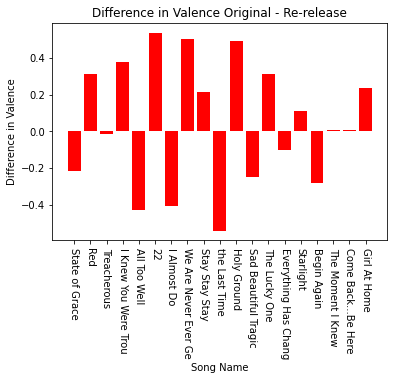

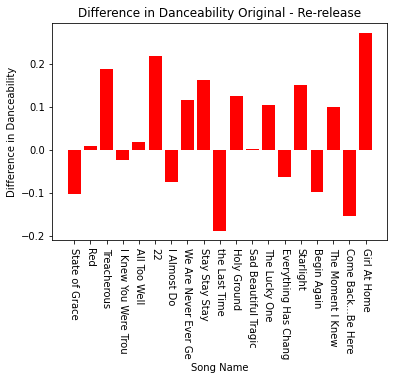

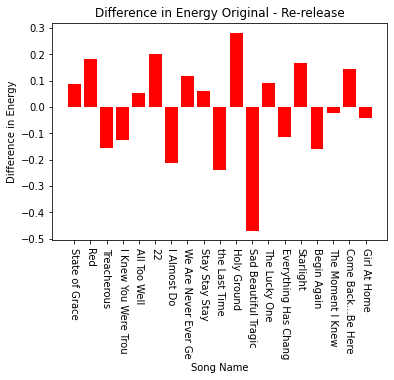

In [28]:
track_list = []

#lists of variable values differece between both versions of each song in album order
valence_list = []
energy_list = []
danceability_list = []

#list of song names in album order
song_names = ("State of Grace", "Red", "Treacherous", "I Knew You Were Trou", "All Too Well", "22", "I Almost Do", "We Are Never Ever Ge", "Stay Stay Stay",
             "the Last Time", "Holy Ground", "Sad Beautiful Tragic", "The Lucky One", "Everything Has Chang", "Starlight", "Begin Again", "The Moment I Knew", "Come Back...Be Here", "Girl At Home")

for i in range(len(track_ids_reds)):
    track_data = getTrackFeatures(track_ids_reds[i])
    #valence, danceability, energy
    valence_list.append(track_data[12])
    danceability_list.append(track_data[4])
    energy_list.append(track_data[5])
    track_list.append(track_data)
    
    

#make a helper function that calculated difference of v2 and v1 from lists
def difference_maker(value_list, song_list, title):
    differences = []
    counter = 0
    for val in value_list:
        if counter == len(value_list):
            break
        if counter % 2 == 0:
                differences.append(value_list[counter] - value_list[counter-1])
                counter+= 1
        else:
            counter+= 1
  
    #calculate the differences from values
    y_pos = np.arange(len(differences))

    # Create bars
    plt.bar(song_list, differences, color='red')

    # Create names on the x-axis
    plt.xticks(song_list, rotation=270)
    
    plt.xlabel('Song Name')
    plt.ylabel('Difference in ' + title)
    plt.title('Difference in ' + title + ' Original - Re-release')

    # Show graphic
    plt.show()
    #positive means original album song is happier, negative means taylor's version is happier 
    
taylor_df_reds = pd.DataFrame(track_list, columns = ['Name', 'Album', 'Length', 'Popularity',
                        'Danceability', 'Energy', 'Loudness', 'Mode', 
                        'Speechiness', 'Acousticness', 'Instrumentalness', 
                        'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Duration'])

difference_maker(valence_list, song_names, 'Valence')

difference_maker(danceability_list, song_names, 'Danceability')

difference_maker(energy_list, song_names, 'Energy')
    


In [30]:
track_list = []
for i in range(len(track_ids_reds)):
    track_data = getTrackFeatures(track_ids_reds[i])
    track_list.append(track_data)
    
taylor_df_reds = pd.DataFrame(track_list, columns = ['Name', 'Album', 'Length', 'Popularity',
                        'Danceability', 'Energy', 'Loudness', 'Mode', 
                        'Speechiness', 'Acousticness', 'Instrumentalness', 
                        'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Duration'])

In [31]:
album_valence = taylor_df_reds.groupby('Album').mean().sort_values(['Valence'],ascending=False)
album_valence = album_valence.reset_index()


album_danceability = taylor_df_reds.groupby('Album').mean().sort_values(['Danceability'],ascending=False)
album_danceability = album_danceability.reset_index()

album_energy = taylor_df_reds.groupby('Album').mean().sort_values(['Energy'],ascending=False)
album_energy = album_energy.reset_index()

Text(0.5, 1.0, 'Average Energy of Albums')

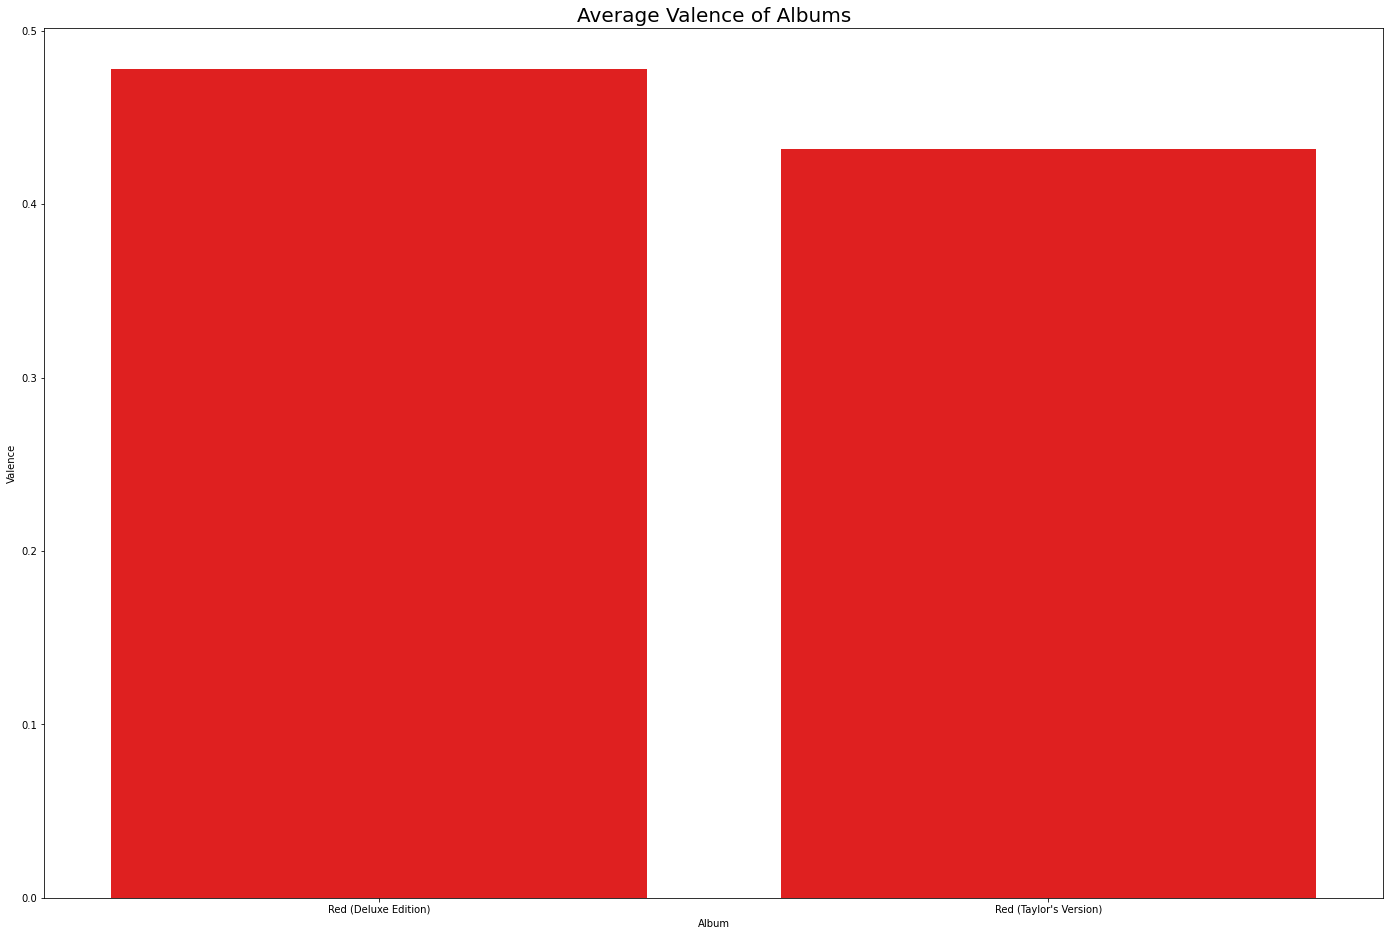

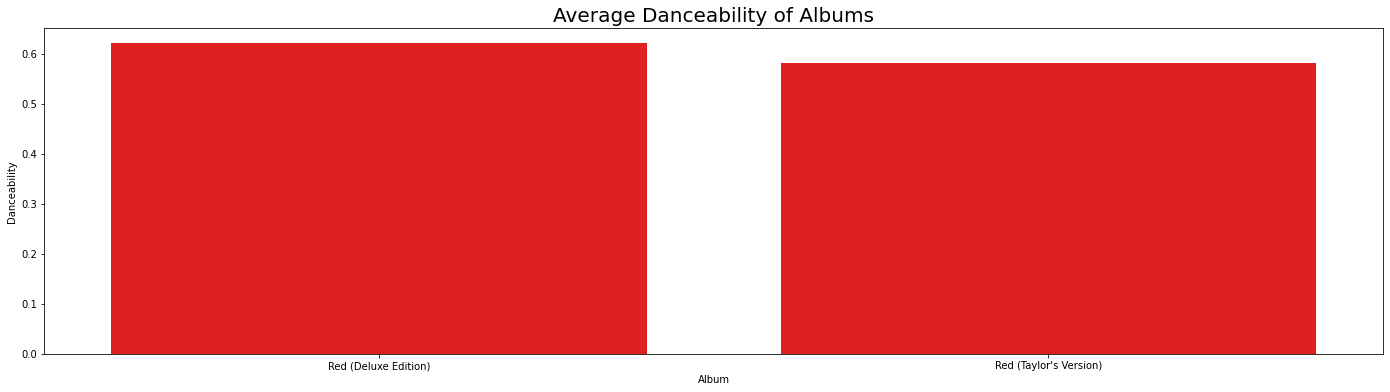

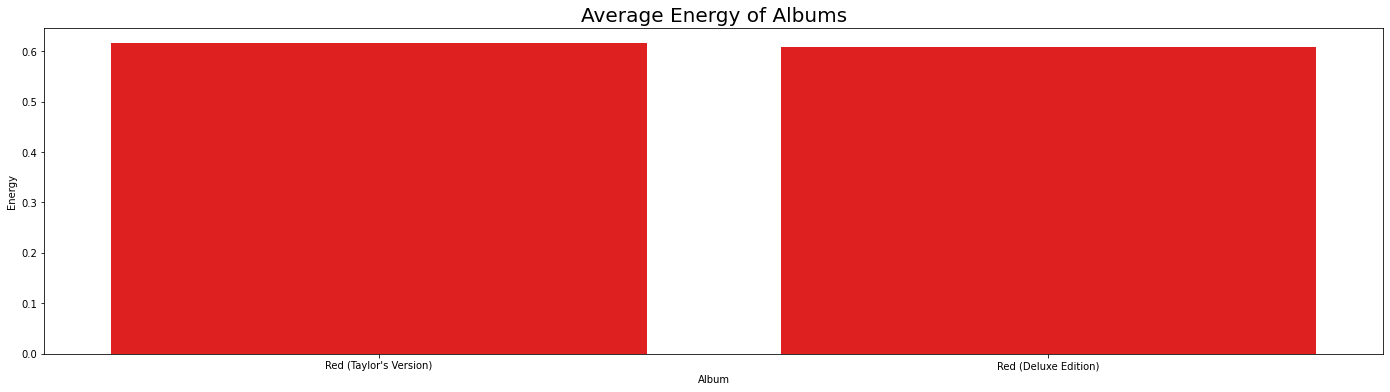

In [35]:
plt.figure(figsize=(24, 16))
sns.barplot(x='Album', y='Valence', data=album_valence, color='red')
plt.title('Average Valence of Albums', fontsize=20)


plt.figure(figsize=(24, 6))
sns.barplot(x='Album', y='Danceability', data=album_danceability, color='red')
plt.title('Average Danceability of Albums', fontsize=20)


plt.figure(figsize=(24, 6))
sns.barplot(x='Album', y='Energy', data=album_energy, color='red')
plt.title('Average Energy of Albums', fontsize=20)

# lookup token for future requests
token_url = "https://accounts.spotify.com/api/token"
method = "POST"
token_data = {
    "grant_type" : "client_credentials"
}

token_headers = {
    "Authorization" : f"Basic {client_creds_b64.decode()}",
    'Content-Type': 'application/x-www-form-urlencoded'
}
